In [1]:
# Multi Layer Perceptron Neural Network

In [2]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import tensorflow as tf

In [3]:
train_data = pd.read_csv(r"C:\Users\Brad\OneDrive - Ashesi University\Desktop\Ashesi University\Senior Year Sem 2\Capstone 2\Data\train_data_2.csv")

In [4]:
train_data.head()

,geo_level_1_id,geo_level_2_id,geo_level_3_id,count_floors_pre_eq,age,area_percentage,height_percentage,land_surface_condition,foundation_type,roof_type,...,has_secondary_use_hotel,has_secondary_use_rental,has_secondary_use_institution,has_secondary_use_school,has_secondary_use_industry,has_secondary_use_health_post,has_secondary_use_gov_office,has_secondary_use_use_police,has_secondary_use_other,damage_grade
0,30,266,1224,1,25,5,2,t,r,n,...,0,0,0,0,0,0,0,0,0,2
1,17,409,12182,2,0,13,7,t,r,n,...,0,0,0,0,0,0,0,0,0,3
2,17,716,7056,2,5,12,6,o,r,q,...,0,0,0,0,0,0,0,0,0,3
3,4,651,105,2,80,5,4,n,r,n,...,0,0,0,0,0,0,0,0,0,2
4,3,1387,3909,5,40,5,10,t,r,n,...,0,0,0,0,0,0,0,0,0,2


In [5]:
damage_labels = [1, 2, 3]

In [6]:
#Finding minimum sample count
min_count = np.inf
for label in damage_labels:
    count = (train_data["damage_grade"] == label).sum()
    if count < min_count:
        min_count = count

In [7]:
print(min_count)

25124


In [8]:
# Selecting random number of samples equal to the min sample count
bal_train_data = pd.concat([train_data[train_data["damage_grade"] == label].sample(min_count) for label in damage_labels])
train_data = bal_train_data

In [9]:
train_data.head()

,geo_level_1_id,geo_level_2_id,geo_level_3_id,count_floors_pre_eq,age,area_percentage,height_percentage,land_surface_condition,foundation_type,roof_type,...,has_secondary_use_hotel,has_secondary_use_rental,has_secondary_use_institution,has_secondary_use_school,has_secondary_use_industry,has_secondary_use_health_post,has_secondary_use_gov_office,has_secondary_use_use_police,has_secondary_use_other,damage_grade
238589,22,1088,8136,2,10,4,4,t,r,n,...,0,0,0,0,0,0,0,0,0,1
170857,30,710,11403,1,40,10,2,t,u,n,...,0,0,0,0,0,0,0,0,0,1
178424,25,1063,423,2,0,13,7,t,i,x,...,0,0,0,0,0,0,0,0,0,1
157443,26,36,11590,1,5,4,3,t,u,n,...,0,0,0,0,0,0,0,0,0,1
12926,13,480,7101,1,995,4,3,t,r,n,...,0,0,0,0,0,0,0,0,0,1


In [10]:
len(train_data['damage_grade'])

75372

In [11]:
from sklearn.preprocessing import LabelEncoder
encoder = LabelEncoder()

In [12]:
train_data["land_surface_condition"] = encoder.fit_transform(train_data["land_surface_condition"])
train_data["foundation_type"] = encoder.fit_transform(train_data["foundation_type"])
train_data["roof_type"] = encoder.fit_transform(train_data["roof_type"])
train_data["ground_floor_type"] = encoder.fit_transform(train_data["ground_floor_type"])
train_data["other_floor_type"] = encoder.fit_transform(train_data["other_floor_type"])
train_data["position"] = encoder.fit_transform(train_data["position"])
train_data["plan_configuration"] = encoder.fit_transform(train_data["plan_configuration"])
train_data["legal_ownership_status"] = encoder.fit_transform(train_data["legal_ownership_status"])

In [13]:
train_data.head()

,geo_level_1_id,geo_level_2_id,geo_level_3_id,count_floors_pre_eq,age,area_percentage,height_percentage,land_surface_condition,foundation_type,roof_type,...,has_secondary_use_hotel,has_secondary_use_rental,has_secondary_use_institution,has_secondary_use_school,has_secondary_use_industry,has_secondary_use_health_post,has_secondary_use_gov_office,has_secondary_use_use_police,has_secondary_use_other,damage_grade
238589,22,1088,8136,2,10,4,4,2,2,0,...,0,0,0,0,0,0,0,0,0,1
170857,30,710,11403,1,40,10,2,2,3,0,...,0,0,0,0,0,0,0,0,0,1
178424,25,1063,423,2,0,13,7,2,1,2,...,0,0,0,0,0,0,0,0,0,1
157443,26,36,11590,1,5,4,3,2,3,0,...,0,0,0,0,0,0,0,0,0,1
12926,13,480,7101,1,995,4,3,2,2,0,...,0,0,0,0,0,0,0,0,0,1


In [14]:
x = train_data.iloc[:, :-1].values
y = train_data.iloc[:,38].values

In [15]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(x, y, test_size=0.20)

In [16]:
#Scaling Data
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)


In [17]:
model = tf.keras.models.Sequential([
    tf.keras.layers.Dense(128, input_shape=(X_train.shape[1],), activation='relu'),
    tf.keras.layers.Dense(64, activation='relu'),
    tf.keras.layers.Dense(32, activation='relu'),
    tf.keras.layers.Dense(10, activation='softmax')
])

In [18]:
model.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics=['accuracy'])
model.fit(X_train, y_train, epochs=10, batch_size=32, validation_data=(X_test, y_test))

Epoch 1/10
1885/1885 [==============================] - 4s 2ms/step - loss: 0.8732 - accuracy: 0.5797 - val_loss: 0.8347 - val_accuracy: 0.5983
Epoch 2/10
1885/1885 [==============================] - 3s 1ms/step - loss: 0.8194 - accuracy: 0.6078 - val_loss: 0.8228 - val_accuracy: 0.6014
Epoch 3/10
1885/1885 [==============================] - 3s 2ms/step - loss: 0.7985 - accuracy: 0.6195 - val_loss: 0.8109 - val_accuracy: 0.6109
Epoch 4/10
1885/1885 [==============================] - 3s 1ms/step - loss: 0.7755 - accuracy: 0.6338 - val_loss: 0.7868 - val_accuracy: 0.6251
Epoch 5/10
1885/1885 [==============================] - 3s 1ms/step - loss: 0.7563 - accuracy: 0.6416 - val_loss: 0.7846 - val_accuracy: 0.6269
Epoch 6/10
1885/1885 [==============================] - 3s 1ms/step - loss: 0.7441 - accuracy: 0.6492 - val_loss: 0.7722 - val_accuracy: 0.6288
Epoch 7/10
1885/1885 [==============================] - 3s 1ms/step - loss: 0.7354 - accuracy: 0.6554 - val_loss: 0.7694 - val_accuracy:

In [19]:
test_loss, test_acc = model.evaluate(X_test, y_test)
print('Test accuracy:', test_acc)

472/472 [==============================] - 0s 917us/step - loss: 0.7648 - accuracy: 0.6391
Test accuracy: 0.6391376256942749


In [20]:
y_pred = model.predict(X_test)

472/472 [==============================] - 0s 853us/step


In [21]:
from sklearn.metrics import classification_report, confusion_matrix
y_pred_classes = np.argmax(y_pred, axis=1)
print(classification_report(y_test, y_pred_classes))


              precision    recall  f1-score   support

           1       0.75      0.78      0.76      4998
           2       0.52      0.48      0.50      5068
           3       0.64      0.65      0.65      5009

    accuracy                           0.64     15075
   macro avg       0.64      0.64      0.64     15075
weighted avg       0.63      0.64      0.64     15075



In [22]:
from sklearn.metrics import confusion_matrix
import seaborn as sns

# Compute the confusion matrix
cm = confusion_matrix(y_test, y_pred_classes)

axis_tick_labels = ['Grade 1', 'Grade 2', 'Grade 3']


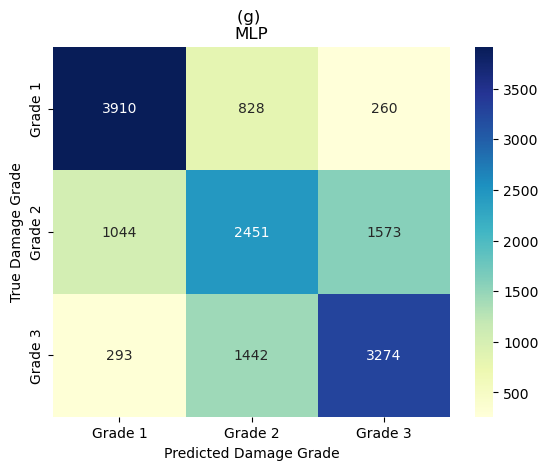

In [24]:
# Plot the confusion matrix as a heatmap
sns.heatmap(cm, annot=True, cmap="YlGnBu", fmt="d", xticklabels=axis_tick_labels, yticklabels=axis_tick_labels)
# plt.title("MLP Prediction Matrix")
plt.title("(g) \nMLP")
plt.xlabel("Predicted Damage Grade")
plt.ylabel("True Damage Grade")
plt.show()